## zomato cost price prediction

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder,StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from joblib import dump, load


### Step1 Read Data

In [4]:
df=pd.read_csv(r"C:\Users\kirth\python\zomato.csv")

In [5]:
df.sample(5)   # Random Data will be generated each time 

,Date,Open,High,Low,Close,Adj Close,Volume
68,2021-11-01,133.600006,134.300003,132.000000,132.649994,132.649994,6200243
534,2023-09-15,100.500000,104.449997,100.349998,102.949997,102.949997,148853172
512,2023-08-16,92.449997,95.599998,91.500000,91.900002,91.900002,76333138
181,2022-04-18,83.699997,84.400002,82.550003,82.900002,82.900002,14209908
288,2022-09-20,64.900002,65.699997,62.400002,62.849998,62.849998,77904810


In [6]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,631,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
unique,631,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-07-23,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,NaN,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,NaN,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,NaN,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,NaN,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,NaN,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07


In [7]:
df.shape

(631, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


#### checking the duplicated values if there

In [9]:
df.duplicated().value_counts()   # No duplicate value seen

False    631
Name: count, dtype: int64

## Step 2: Data Cleaning
Data type of "date" column is in object,So have to change this data type

In [10]:
df["Date"] = pd.DatetimeIndex(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       631 non-null    datetime64[ns]
 1   Open       631 non-null    float64       
 2   High       631 non-null    float64       
 3   Low        631 non-null    float64       
 4   Close      631 non-null    float64       
 5   Adj Close  631 non-null    float64       
 6   Volume     631 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.6 KB


In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,631,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,2022-10-29 18:54:11.980982528,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
min,2021-07-23 00:00:00,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,2022-03-10 12:00:00,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,2022-10-31 00:00:00,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,2023-06-19 12:00:00,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,2024-02-07 00:00:00,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08
std,NaN,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Step 3 EDA

<Axes: xlabel='Date'>

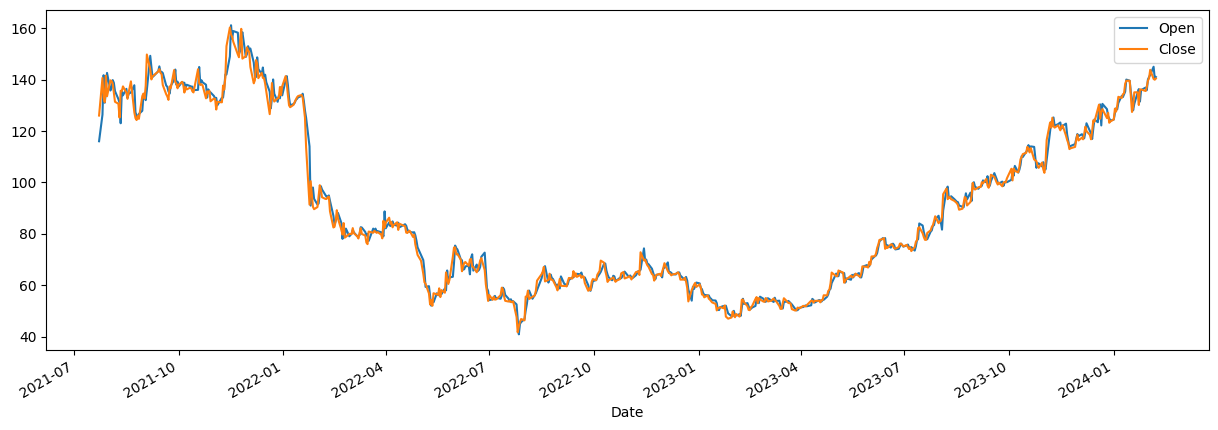

In [13]:
df.plot(x="Date",y=["Open","Close"],figsize=(15,5))

<Axes: xlabel='Date'>

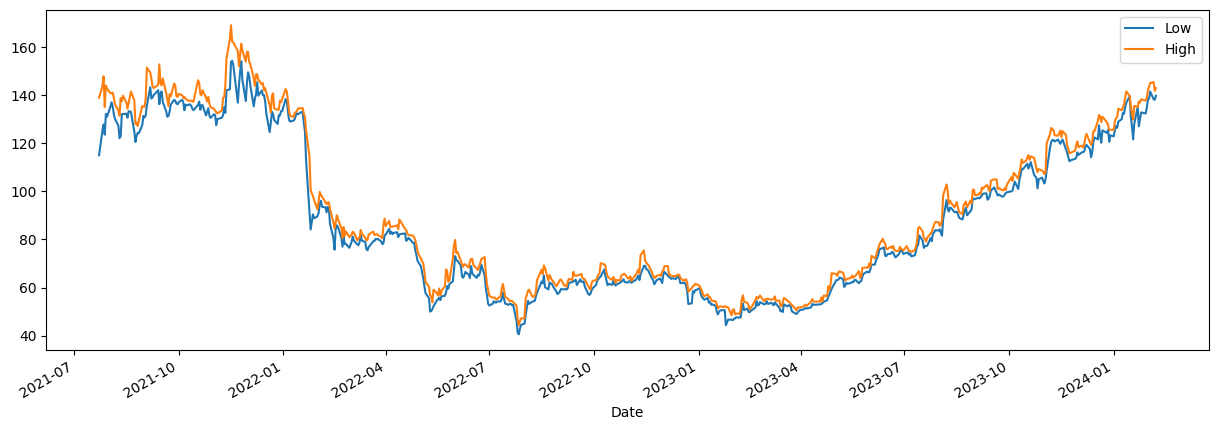

In [14]:
df.plot(x="Date",y=["Low","High"],figsize=(15,5))

In [15]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,23,7,2021
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,26,7,2021
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,27,7,2021
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,28,7,2021
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,29,7,2021


## Finding daily lag

In [17]:
df["Daily lag"] = df['Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Daily lag
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,23,7,2021,NaN
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,26,7,2021,126.000000
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,27,7,2021,140.649994
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,28,7,2021,132.899994
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,29,7,2021,131.199997


## Daily Returns

In [18]:
df["Daily Returns"] = (df["Daily lag"]/df["Close"])-1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Daily lag,Daily Returns
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,23,7,2021,NaN,NaN
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,26,7,2021,126.000000,-0.104159
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,27,7,2021,140.649994,0.058315
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,28,7,2021,132.899994,0.012957
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,29,7,2021,131.199997,-0.073119


## Daily returns mean

In [19]:
mean = df["Daily Returns"].mean()
mean

0.0004158354654794571

## Std

In [20]:
std = df["Daily Returns"].std()
std

0.034402136487827896

### Splitting the Data

In [21]:
X=df[['Day','Month','Year','Open']]
y=df[['Close']]

In [22]:
X.head()

,Day,Month,Year,Open
0,23,7,2021,116.000000
1,26,7,2021,126.349998
2,27,7,2021,141.699997
3,28,7,2021,131.000000
4,29,7,2021,134.949997


In [23]:
X.shape

(631, 4)

In [24]:
y.head()

,Close
0,126.000000
1,140.649994
2,132.899994
3,131.199997
4,141.550003


In [25]:
y.shape

(631, 1)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=123)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.50,random_state=123)


X_train.to_csv(r"C:\Users\kirth\python\data 1\X_train.csv",index=False)
X_test.to_csv(r"C:\Users\kirth\python\data 1\X_test.csv",index=False)
y_train.to_csv(r"C:\Users\kirth\python\data 1\y_train.csv",index=False)
y_test.to_csv(r"C:\Users\kirth\python\data 1\y_test.csv",index=False)
X_val.to_csv(r"C:\Users\kirth\python\data 1\X_val.csv",index=False)
y_val.to_csv(r"C:\Users\kirth\python\data 1\y_val.csv",index=False)


In [95]:
print(X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape)

(378, 4) (127, 4) (126, 4) (378, 1) (127, 1) (126, 1)


## X Train

In [28]:
X_train

,Day,Month,Year,Open
295,29,9,2022,59.200001
536,20,9,2023,101.300003
406,10,3,2023,53.799999
463,6,6,2023,71.550003
308,19,10,2022,63.400002
...,...,...,...,...
98,15,12,2021,140.500000
322,10,11,2022,65.500000
382,3,2,2023,48.150002
365,10,1,2023,56.000000


## Y TRAIN

In [29]:
y_train

,Close
295,61.200001
536,100.000000
406,53.849998
463,72.349998
308,62.049999
...,...
98,140.600006
322,63.950001
382,48.750000
365,54.700001


### Separating Numerical and Categorical columns 

In [30]:
numerical_cols=X_train.select_dtypes(exclude='object')

In [31]:
numerical_cols

,Day,Month,Year,Open
295,29,9,2022,59.200001
536,20,9,2023,101.300003
406,10,3,2023,53.799999
463,6,6,2023,71.550003
308,19,10,2022,63.400002
...,...,...,...,...
98,15,12,2021,140.500000
322,10,11,2022,65.500000
382,3,2,2023,48.150002
365,10,1,2023,56.000000


In [32]:
categorical_cols=X_train.select_dtypes(include='object')

In [33]:
categorical_cols

""
295
536
406
463
308
...
98
322
382
365


### Encoding categorical data

In [34]:
oh=OneHotEncoder()

In [35]:
encoder=oh.fit(categorical_cols)

#getting coloumns name for dataframe
col=encoder.get_feature_names_out()

In [36]:
#saving encoder
dump(encoder,r'C:\Users\kirth\python\data 1\models\encoder\one_hot_encoder.pkl')

['C:\\Users\\kirth\\python\\data 1\\models\\encoder\\one_hot_encoder.pkl']

In [37]:
#Loading encoder
encoder_model=load(r'C:\Users\kirth\python\data 1\models\encoder/one_hot_encoder.pkl')
transform=encoder_model.transform(categorical_cols).toarray()

In [38]:
categorical_encode_data=pd.DataFrame(transform,columns=col)
categorical_encode_data

""
0
1
2
3
4
...
436
437
438
439


### Scaling Numerical Data

In [39]:
scaler=StandardScaler()

In [40]:
numerical_scaler=scaler.fit(numerical_cols)
numerical_scaler

StandardScaler()

In [41]:
StandardScaler()

StandardScaler()

In [43]:
dump(numerical_scaler,r'C:\Users\kirth\python\data 1\models\scaling\standard_scaler.pkl')

['C:\\Users\\kirth\\python\\data 1\\models\\scaling\\standard_scaler.pkl']

In [45]:
model_scaling=load(r'C:\Users\kirth\python\data 1\models\scaling\standard_scaler.pkl')

In [46]:
scaled_data=model_scaling.transform(numerical_cols)

In [47]:
numerical_scaled_data=pd.DataFrame(scaled_data,columns=numerical_cols.columns)
numerical_scaled_data

,Day,Month,Year,Open
0,1.475349,0.565901,-0.363719,-0.973256
1,0.469740,0.565901,0.870128,0.314117
2,-0.647603,-1.096001,0.870128,-1.138383
3,-1.094540,-0.265050,0.870128,-0.595606
4,0.358006,0.842884,-0.363719,-0.844825
...,...,...,...,...
436,-0.088931,1.396852,-1.597567,1.512812
437,-0.647603,1.119868,-0.363719,-0.780609
438,-1.429743,-1.372984,0.870128,-1.311154
439,-0.647603,-1.649968,0.870128,-1.071109


### Concat Numerical column and Categorical column

In [48]:
Features=pd.concat([numerical_scaled_data,categorical_encode_data],axis=1)

In [49]:
Features

,Day,Month,Year,Open
0,1.475349,0.565901,-0.363719,-0.973256
1,0.469740,0.565901,0.870128,0.314117
2,-0.647603,-1.096001,0.870128,-1.138383
3,-1.094540,-0.265050,0.870128,-0.595606
4,0.358006,0.842884,-0.363719,-0.844825
...,...,...,...,...
436,-0.088931,1.396852,-1.597567,1.512812
437,-0.647603,1.119868,-0.363719,-0.780609
438,-1.429743,-1.372984,0.870128,-1.311154
439,-0.647603,-1.649968,0.870128,-1.071109


## linear regression

In [80]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [81]:
#linear regression
model=LinearRegression()
model.fit(Features,y_train)

LinearRegression()

In [82]:
dump(model,r'C:\Users\kirth\python\data 1\models\lr.pkl')

['C:\\Users\\kirth\\python\\data 1\\models\\lr.pkl']

In [83]:
lr=load(r'C:\Users\kirth\python\data 1\models\lr.pkl')

In [84]:
print('train score: ',model.score(Features,y_train)*100)

train score:  99.13053860305688


## DecisionTreeRegressor

In [85]:
model_DT=DecisionTreeRegressor()
model_DT.fit(Features,y_train)
dump(model_DT,r'C:\Users\kirth\python\data 1\models\DT.pkl')
print('train score: ',model_DT.score(Features,y_train)*100)

train score:  100.0


## RandomForestRegressor

In [86]:
model_RF=RandomForestRegressor()
model_RF.fit(Features,y_train)
dump(model_RF,r'C:\Users\kirth\python\data 1\models\RF.pkl')
print('train score: ',model_RF.score(Features,y_train)*100)

C:\Users\kirth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train score:  99.84842314177003


## EVALUATION 

In [107]:
#evaluvation
from evaluation_pipeline import evaluation_pipeline

In [108]:
_,score=evaluation_pipeline(r"C:\Users\kirth\python\data 1\X_val.csv",r"C:\Users\kirth\python\data 1\y_val.csv",r"C:\Users\kirth\python\data 1\models\lr.pkl")
score

99.22321320445593

In [109]:
_,score=evaluation_pipeline(r"C:\Users\kirth\python\data 1\X_val.csv",r"C:\Users\kirth\python\data 1\y_val.csv",r"C:\Users\kirth\python\data 1\models\DT.pkl")
score

99.20620478579575

In [110]:
_,score=evaluation_pipeline(r"C:\Users\kirth\python\data 1\X_val.csv",r"C:\Users\kirth\python\data 1\y_val.csv",r"C:\Users\kirth\python\data 1\models\RF.pkl")
score

99.4584932606706

                                                                 ##THANK YOU